In [41]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [73]:
credit_new = pd.read_csv("D:/DataScience/regression/logistic reg/creditcard.csv", usecols=["card", "reports", "age", "income", "share", "expenditure", "owner", "selfemp", "dependents", "months", "majorcards", "active"], true_values=["yes"], false_values=["no"])

In [74]:
credit_new.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [75]:
credit_new.shape

(1319, 12)

In [76]:
credit_new.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,True,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,True,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,True,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,True,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,True,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


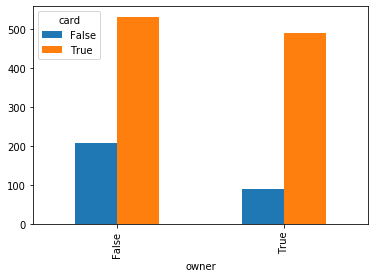

In [77]:
pd.crosstab(credit_new.owner,credit_new.card).plot(kind="bar")
plt.show()

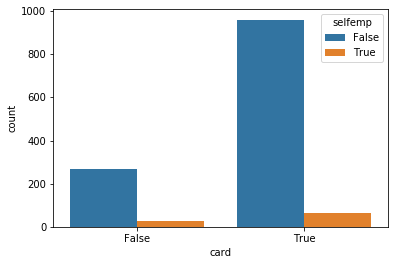

In [78]:
sb.countplot(x = "card", hue = "selfemp", data = credit_new)

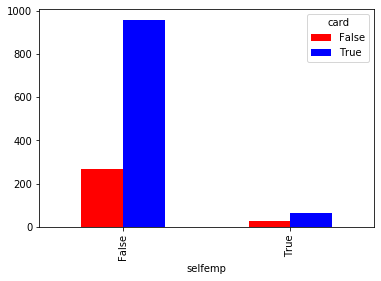

In [79]:
pd.crosstab(credit_new.selfemp,credit_new.card).plot(kind="bar", color = {"red","blue"})

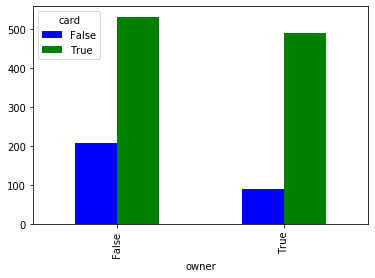

In [80]:
pd.crosstab(credit_new.owner,credit_new.card).plot(kind="bar", color = {"green","blue"})

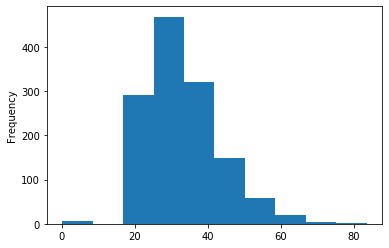

In [81]:
credit_new["age"].plot.hist()

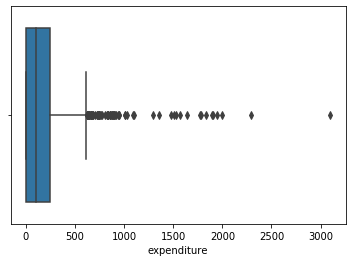

In [82]:
sb.boxplot(x="expenditure",data = credit_new)

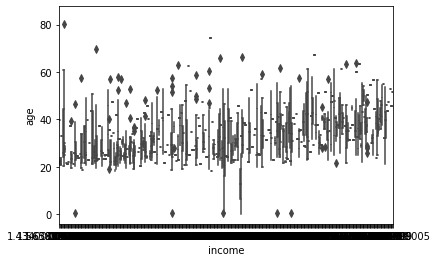

In [83]:
sb.boxplot(x="income", y ="age", data= credit_new)

In [84]:
owner1=pd.get_dummies(credit_new['owner'],drop_first=True)
owner1.head()

,True
0,1
1,0
2,1
3,0
4,1


In [102]:
selfemp1=pd.get_dummies(credit_new['selfemp'],drop_first=True)
selfemp1.head(2)

,True
0,0
1,0


In [103]:
credit_new = pd.concat([credit_new,owner1,selfemp1],axis=1)

In [104]:
credit_new.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,...,True,False,True,True,False,True,True,True,True,True
0,True,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,...,1,1,0,1,1,0,1,0,1,0
1,True,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,...,0,1,0,0,1,0,0,0,0,0
2,True,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,...,1,1,0,1,1,0,1,0,1,0
3,True,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,...,0,1,0,0,1,0,0,0,0,0
4,True,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,...,1,1,0,1,1,0,1,0,1,0


In [105]:
credit_new.drop(['months','reports','share',],axis=1,inplace=True)

In [107]:
credit_new.head(20)

,card,age,income,expenditure,owner,selfemp,dependents,majorcards,active,True,...,True,False,True,True,False,True,True,True,True,True
0,True,37.66667,4.5200,124.983300,True,False,3,1,12,1,...,1,1,0,1,1,0,1,0,1,0
1,True,33.25000,2.4200,9.854167,False,False,3,1,13,0,...,0,1,0,0,1,0,0,0,0,0
2,True,33.66667,4.5000,15.000000,True,False,4,1,5,1,...,1,1,0,1,1,0,1,0,1,0
3,True,30.50000,2.5400,137.869200,False,False,0,1,7,0,...,0,1,0,0,1,0,0,0,0,0
4,True,32.16667,9.7867,546.503300,True,False,2,1,5,1,...,1,1,0,1,1,0,1,0,1,0
5,True,23.25000,2.5000,91.996670,False,False,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
6,True,27.91667,3.9600,40.833330,False,False,2,1,5,0,...,0,1,0,0,1,0,0,0,0,0
7,True,29.16667,2.3700,150.790000,True,False,0,1,3,1,...,1,1,0,1,1,0,1,0,1,0
8,True,37.00000,3.8000,777.821700,True,False,0,1,6,1,...,1,1,0,1,1,0,1,0,1,0
9,True,28.41667,3.2000,52.580000,False,False,0,1,18,0,...,0,1,0,0,1,0,0,0,0,0


In [109]:
from sklearn.linear_model import LogisticRegression
x = credit_new.drop("card", axis=1)
y = credit_new["card"]

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [113]:
logmodel= LogisticRegression()

In [114]:
logmodel.fit(x_train,y_train)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
predictions= logmodel.predict(x_test)

In [117]:
from sklearn.metrics import classification_report

In [118]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n       False       0.93      1.00      0.96        81\n        True       1.00      0.98      0.99       315\n\n    accuracy                           0.98       396\n   macro avg       0.97      0.99      0.98       396\nweighted avg       0.99      0.98      0.99       396\n'

In [121]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 81,   0],
       [  6, 309]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9848484848484849

In [127]:
print ("yo!")

yo!
